In [ ]:
# Trabalho de Conclusão de Curso apresentado ao Curso de Especialização em Inteligência Artificial e Aprendizado de Máquina, como requisito parcial à obtenção do título de Especialista.
# Utilizando Machine Learning para a identificação de distúrbios do sono
# Marcelo Soares Souza
# 2023-08-04

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset/sleep_health_and_lifestyle_dataset.csv')

In [3]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [6]:
df['Age'].isnull().values.any()

False

In [7]:
df.iloc[:, :-1].isnull().values.any() # Verificando se Existe algum valor Null nos Preditores (Features)

False

In [8]:
df.iloc[:, :13].isnull().values.any() # Verificando se Existe algum valor Null na varíavel dependente (Alvo)

True

In [9]:
df["Sleep Disorder"].fillna("No Problem", inplace = True)

In [10]:
df.iloc[:, :13].isnull().values.any() # Verificando se Existe algum valor Null na varíavel dependente (Alvo)

False

In [11]:
df.iloc[:, -1].isnull().values.any()

False

In [12]:
df = df.drop(columns=['Person ID', 'Blood Pressure'])

In [13]:
def remove_outliers(df, columns, n_std):
    for col in columns:
        print('Tratando a Coluna: {}'.format(col))
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]

    return df

In [14]:
print(f'[starting] Antes da remoção de Outliers: {len(df)}')
df = remove_outliers(df, ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'], 3)
print(f'[starting] Após a remoção de Outliers: {len(df)}')

[starting] Antes da remoção de Outliers: 374
Tratando a Coluna: Age
Tratando a Coluna: Sleep Duration
Tratando a Coluna: Quality of Sleep
Tratando a Coluna: Physical Activity Level
Tratando a Coluna: Stress Level
Tratando a Coluna: Heart Rate
Tratando a Coluna: Daily Steps
[starting] Após a remoção de Outliers: 365


<Figure size 640x480 with 0 Axes>

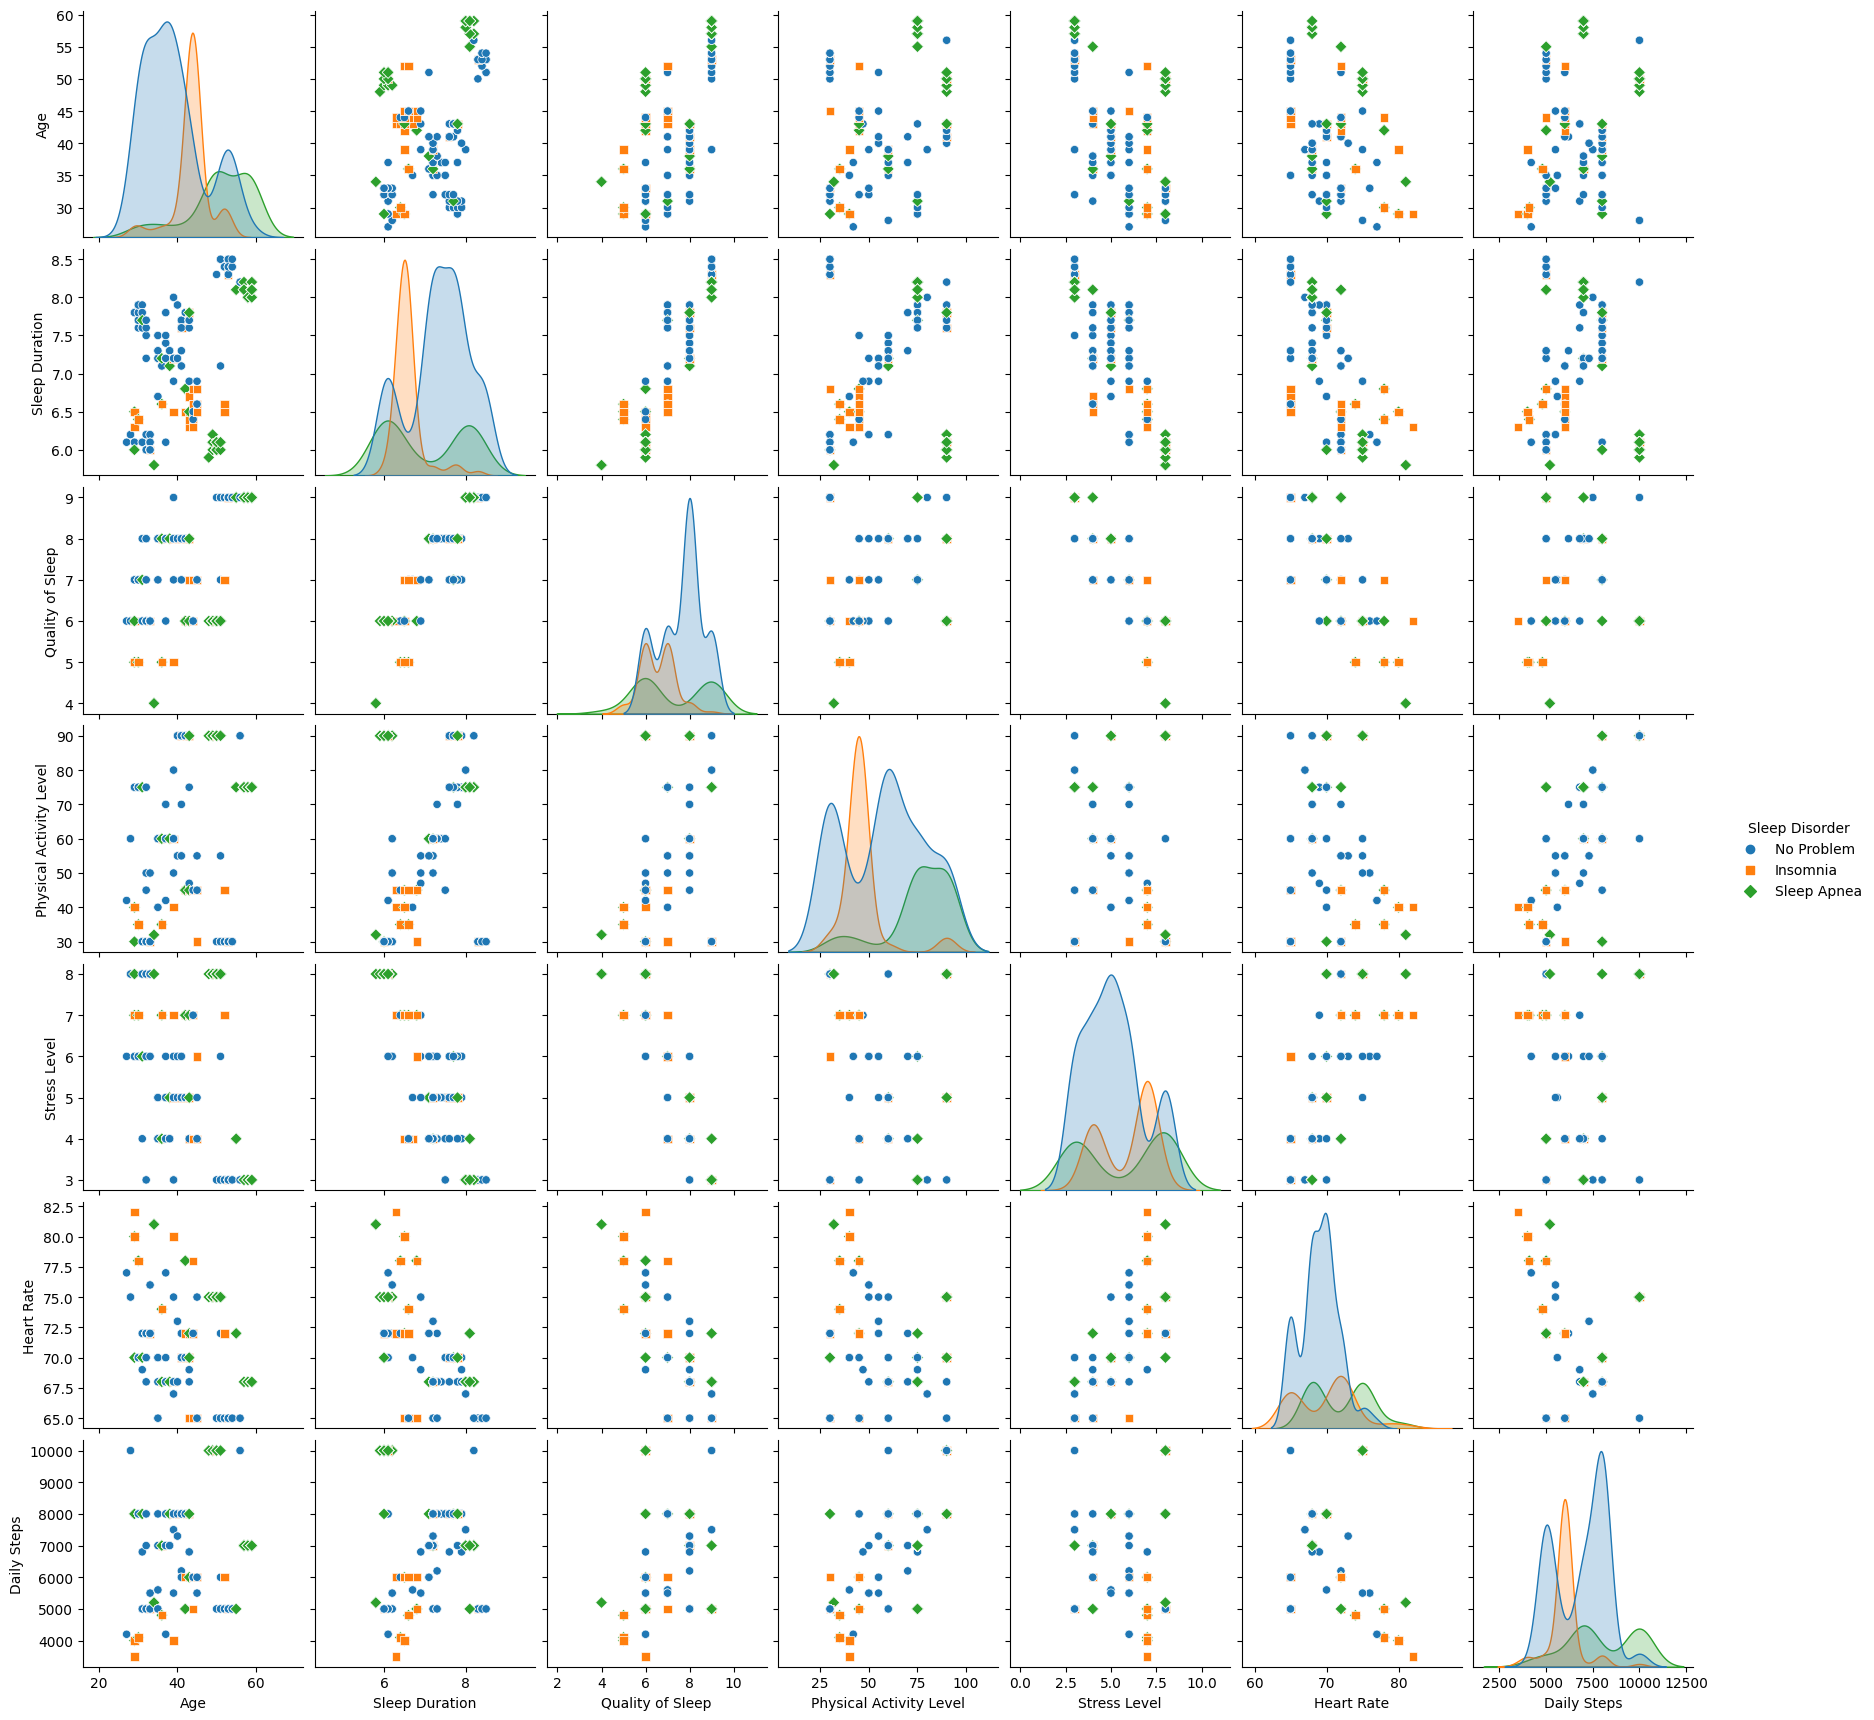

In [15]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(6.4,4.8))
plot = sns.pairplot(df, hue='Sleep Disorder', markers=["o", "s", "D"])
plt.show()

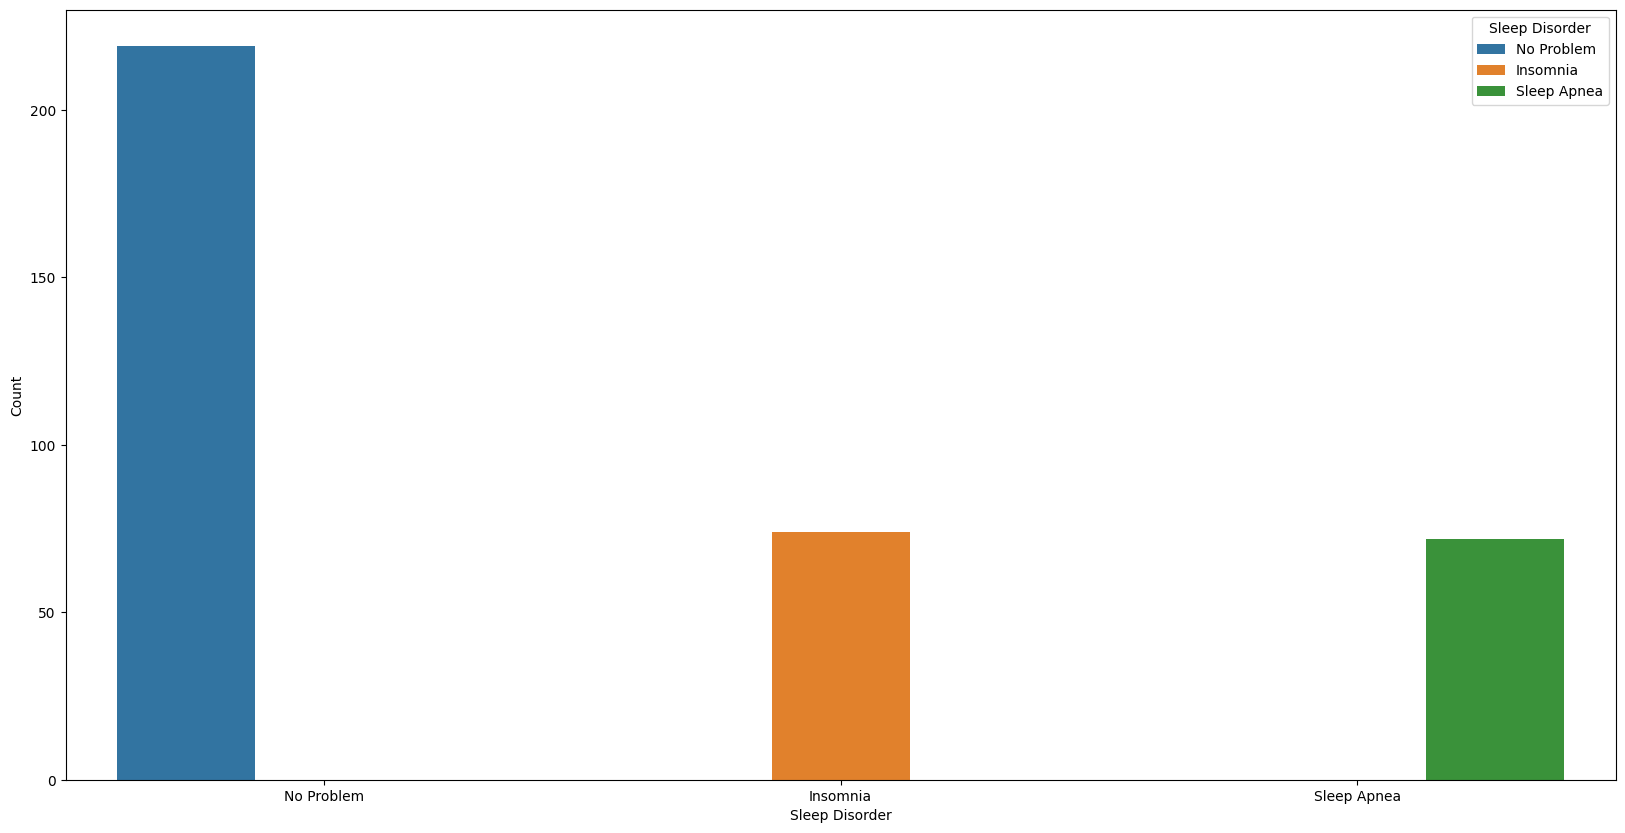

In [16]:
dft = df['Sleep Disorder'].value_counts().reset_index(name='Count')
plt.figure(figsize=(20,10))
plot = sns.barplot(x='Sleep Disorder', y='Count', data=dft, hue='Sleep Disorder')
# fig = plot.get_figure()
# fig.savefig("barplot.png")
plt.show()

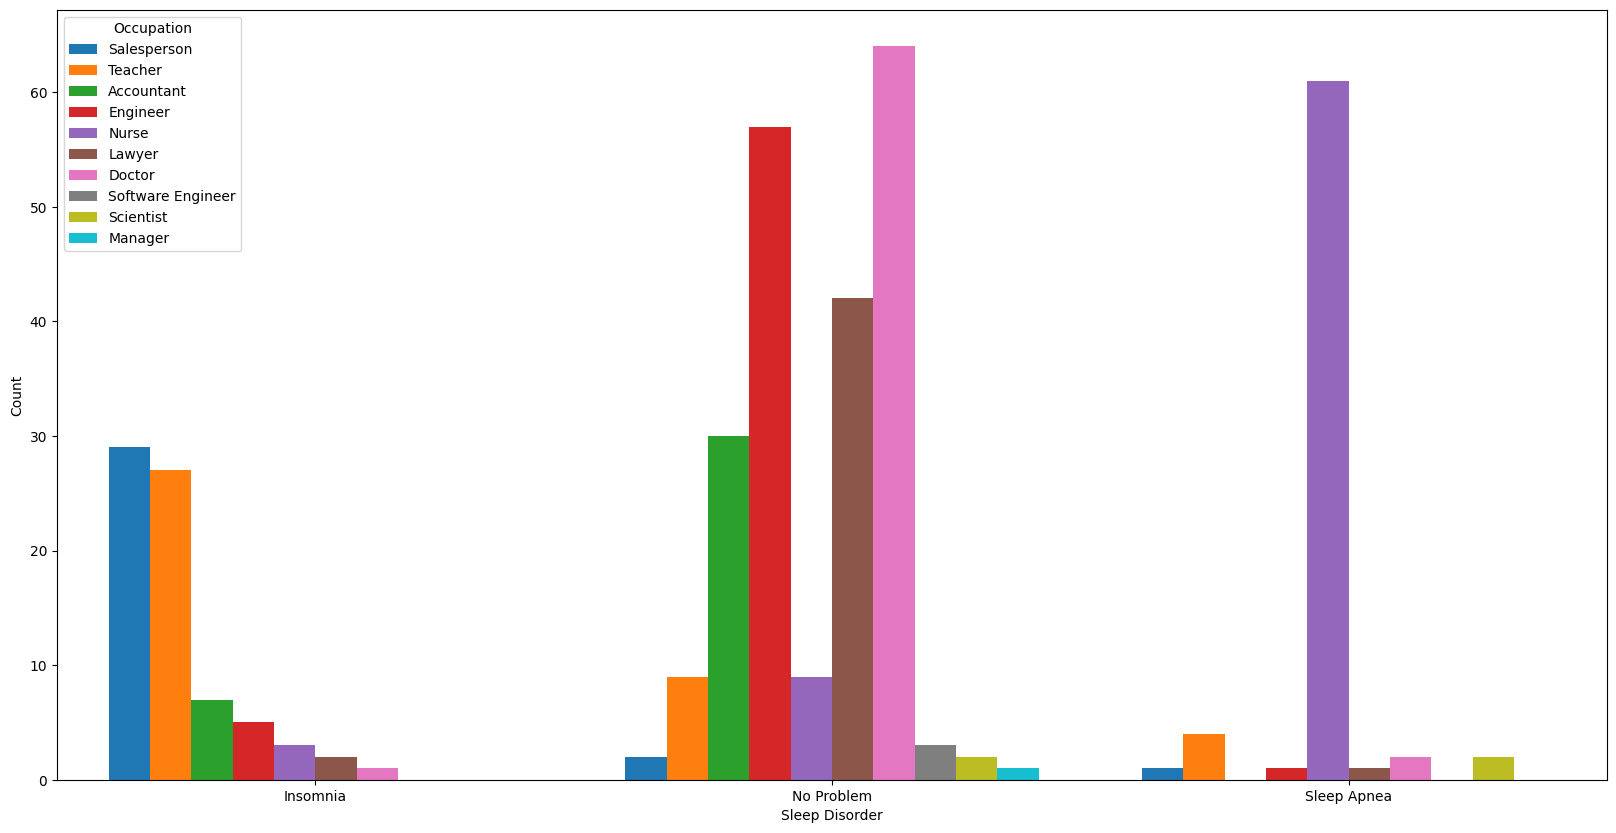

In [17]:
dft = df.groupby(['Sleep Disorder']).Occupation.value_counts().reset_index(name='Count')
plt.figure(figsize=(20,10))
sns.barplot(x='Sleep Disorder', y='Count', data=dft, hue='Occupation', saturation=1)
plt.show()

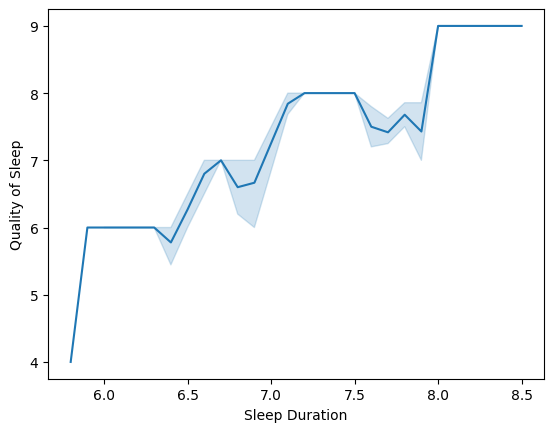

In [18]:
sns.lineplot(data=df, x="Sleep Duration", y="Quality of Sleep")
plt.show()

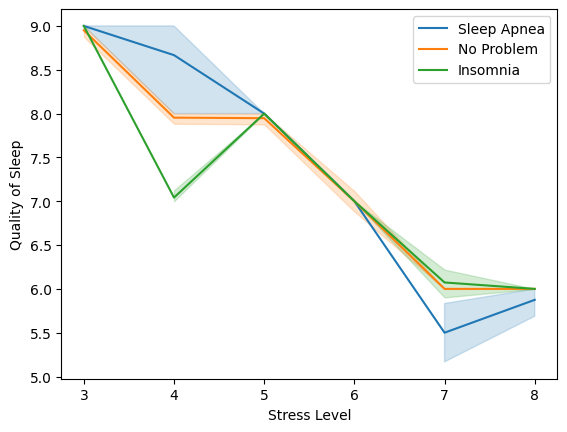

In [19]:
apnea = df[df['Sleep Disorder']=='Sleep Apnea'].reset_index(drop=True)
noproblem = df[df['Sleep Disorder']=='No Problem'].reset_index(drop=True)
insomnia = df[df['Sleep Disorder']=='Insomnia'].reset_index(drop=True)

sns.lineplot(x='Stress Level', y='Quality of Sleep', data=apnea, legend='auto', label='Sleep Apnea')
sns.lineplot(x='Stress Level', y='Quality of Sleep', data=noproblem, legend='auto', label='No Problem')
sns.lineplot(x='Stress Level', y='Quality of Sleep', data=insomnia, legend='auto', label='Insomnia')

plt.show()

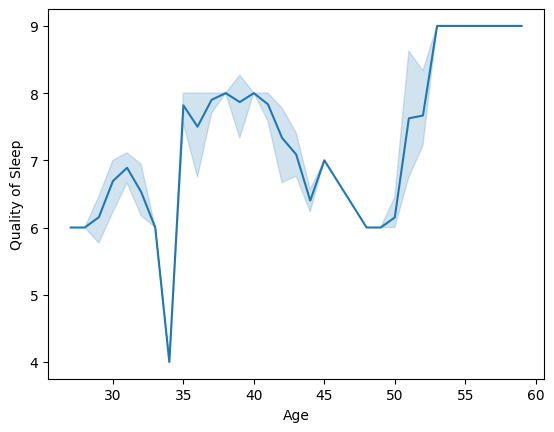

In [20]:
sns.lineplot(data=df, x="Age", y="Quality of Sleep")
plt.show()

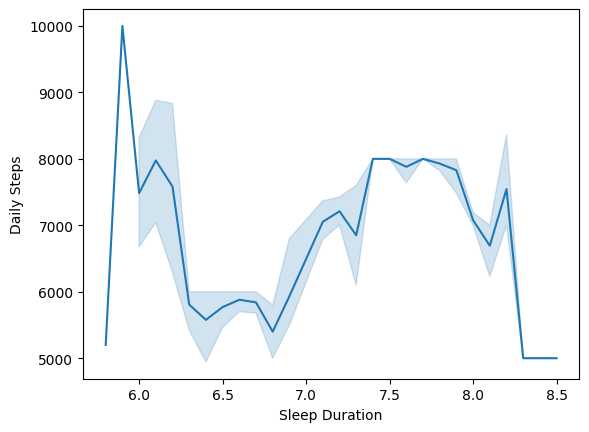

In [21]:
sns.lineplot(data=df, x='Sleep Duration', y='Daily Steps')
plt.show()

In [22]:
columns = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps']
target = 'Sleep Disorder'
X = df.loc[:, columns]
y = df.loc[:, target]
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [24]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 2, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [25]:
X[0]

array([0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 1.0e+00, 2.7e+01, 6.1e+00, 6.0e+00, 4.2e+01, 6.0e+00,
       7.7e+01, 4.2e+03])

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0,

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
X_train

array([[0.0e+00, 1.0e+00, 0.0e+00, ..., 5.0e+00, 7.0e+01, 8.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 3.0e+00, 6.8e+01, 7.0e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 5.0e+00, 7.0e+01, 8.0e+03],
       ...,
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 3.0e+00, 6.5e+01, 5.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 3.0e+00, 6.8e+01, 7.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 6.0e+00, 7.7e+01, 4.2e+03]])

In [29]:
from imblearn.over_sampling import SMOTE, SMOTEN
from collections import Counter
print(f'Antes do SMOTE: {sorted(Counter(y_train).items())}')
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
X_train, y_train = X_train_res, y_train_res
print(f'Depois do SMOTE: {sorted(Counter(y_train).items())}')

Antes do SMOTE: [(0, 55), (1, 182), (2, 55)]
Depois do SMOTE: [(0, 182), (1, 182), (2, 182)]


In [30]:
X_train

array([[0.0e+00, 1.0e+00, 0.0e+00, ..., 5.0e+00, 7.0e+01, 8.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 3.0e+00, 6.8e+01, 7.0e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 5.0e+00, 7.0e+01, 8.0e+03],
       ...,
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 8.0e+00, 7.5e+01, 1.0e+04],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 8.0e+00, 7.5e+01, 1.0e+04],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 8.0e+00, 7.5e+01, 1.0e+04]])

In [31]:
from collections import Counter
print(f'Counter of Y Classes in training {Counter(y_train)}')

Counter of Y Classes in training Counter({1: 182, 2: 182, 0: 182})


In [32]:
X_train

array([[0.0e+00, 1.0e+00, 0.0e+00, ..., 5.0e+00, 7.0e+01, 8.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 3.0e+00, 6.8e+01, 7.0e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 5.0e+00, 7.0e+01, 8.0e+03],
       ...,
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 8.0e+00, 7.5e+01, 1.0e+04],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 8.0e+00, 7.5e+01, 1.0e+04],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 8.0e+00, 7.5e+01, 1.0e+04]])

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:] = sc.fit_transform(X_train[:, 0: ])
X_test[:, 0:] = sc.transform(X_test[:, 0:])

In [34]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=42, max_iter=512).fit(X_train, y_train)
lr_prediction = lr_classifier.predict(X_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(random_state=42).fit(X_train, y_train)
rfc_prediction = rfc_classifier.predict(X_test)

In [36]:
from sklearn.neural_network import MLPClassifier
MLPC_classifier = MLPClassifier(random_state=42).fit(X_train, y_train)
MLPC_prediction = MLPC_classifier.predict(X_test)

In [37]:
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             classification_report, confusion_matrix, f1_score,
                             precision_score, recall_score)


In [38]:
lr_accuracy = accuracy_score(y_test, lr_prediction)
lr_precision = precision_score(y_test, lr_prediction, average='weighted', zero_division=np.nan)
lr_f1 = f1_score(y_test, lr_prediction, average='weighted', zero_division=np.nan)
lr_recall = recall_score(y_test, lr_prediction, average='weighted', zero_division=np.nan)

In [39]:
print(f'Accuracy: {lr_accuracy:.0%}')
print(f'Precision: {lr_precision:.0%}')
print(f'F1: {lr_f1:.0%}')
print(f'Recall: {lr_recall:.0%}')
print(f'Report:\n {classification_report(y_test, lr_prediction)}')

Accuracy: 86%
Precision: 88%
F1: 86%
Recall: 86%
Report:
               precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.88      0.97      0.92        37
           2       0.74      0.82      0.78        17

    accuracy                           0.86        73
   macro avg       0.87      0.83      0.84        73
weighted avg       0.88      0.86      0.86        73



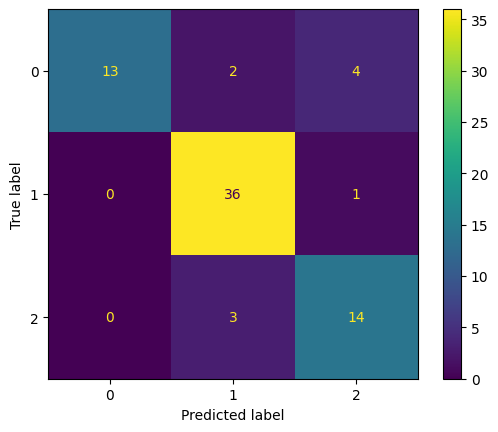

In [40]:
cm = confusion_matrix(y_test, lr_prediction, labels=lr_classifier.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_classifier.classes_).plot()
plt.show()

In [41]:
rfc_accuracy = accuracy_score(y_test, rfc_prediction)
rfc_precision = precision_score(y_test, rfc_prediction, average='weighted', zero_division=np.nan)
rfc_f1 = f1_score(y_test, rfc_prediction, average='weighted', zero_division=np.nan)
rfc_recall = recall_score(y_test, rfc_prediction, average='weighted', zero_division=np.nan)

In [42]:
print(f'Accuracy: {rfc_accuracy:.0%}')
print(f'Precision: {rfc_precision:.0%}')
print(f'F1: {rfc_f1:.0%}')
print(f'Recall: {rfc_recall:.0%}')
print(f'Report:\n {classification_report(y_test, rfc_prediction)}')

Accuracy: 90%
Precision: 91%
F1: 90%
Recall: 90%
Report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.92      0.97      0.95        37
           2       0.80      0.94      0.86        17

    accuracy                           0.90        73
   macro avg       0.91      0.88      0.89        73
weighted avg       0.91      0.90      0.90        73



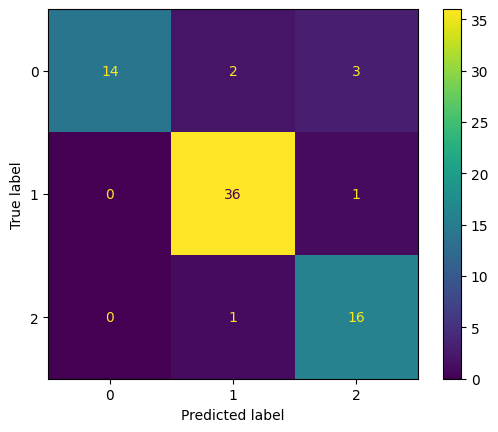

In [43]:
cm = confusion_matrix(y_test, rfc_prediction, labels=rfc_classifier.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_classifier.classes_).plot()
plt.show()

In [44]:
MLPC_accuracy = accuracy_score(y_test, MLPC_prediction)
MLPC_precision = precision_score(y_test, MLPC_prediction, average='weighted', zero_division=np.nan)
MLPC_f1 = f1_score(y_test, MLPC_prediction, average='weighted', zero_division=np.nan)
MLPC_recall = recall_score(y_test, MLPC_prediction, average='weighted', zero_division=np.nan)

In [45]:
print(f'Accuracy: {MLPC_accuracy:.0%}')
print(f'Precision: {MLPC_precision:.0%}')
print(f'F1: {MLPC_f1:.0%}')
print(f'Recall: {MLPC_recall:.0%}')
print(f'Report:\n {classification_report(y_test, MLPC_prediction)}')

Accuracy: 88%
Precision: 89%
F1: 88%
Recall: 88%
Report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.88      0.97      0.92        37
           2       0.78      0.82      0.80        17

    accuracy                           0.88        73
   macro avg       0.89      0.84      0.86        73
weighted avg       0.89      0.88      0.88        73



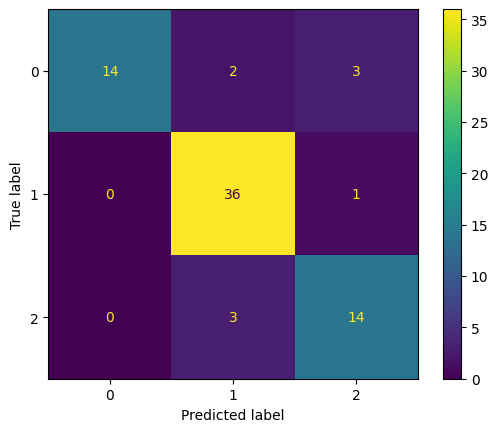

In [46]:
cm = confusion_matrix(y_test, MLPC_prediction, labels=MLPC_classifier.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MLPC_classifier.classes_).plot()
plt.show()